# Name : Nikhil M. Agrawal, TSF - Task 1


# Importing all the required libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Importing the Dataset

In [4]:
data = "http://bit.ly/w-data"
load = pd.read_csv(data)
load

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Checking the general statistical info of data

In [5]:
load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
load.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Checking if there are any null values 

In [23]:
load.isnull().sum()


Hours     0
Scores    0
dtype: int64

Checking the data for any duplicate values

In [24]:
load.duplicated().sum()

0

In [9]:
load.mean()

Hours      5.012
Scores    51.480
dtype: float64

# Finding the relationship between the data

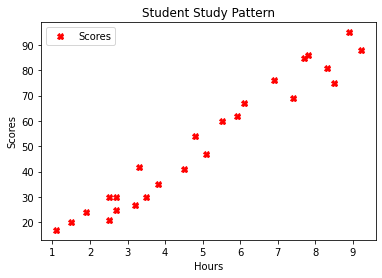

In [7]:
load.plot(x = 'Hours', y = 'Scores', style = 'X', color = 'red')
plt.title("Student Study Pattern")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# Preparing the Data

In [10]:
x = load.iloc[:, :-1].values
y = load.iloc[:, 1].values

print("Shape of X : ",x.shape)
print("Shape of Y : ", y.shape)

Shape of X :  (25, 1)
Shape of Y :  (25,)


# Splitting the dataset

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [12]:
print("Shape of X Train : ", X_train.shape)
print("Shape of X Test  : ", X_test.shape)
print("Shape of Y Train : ", y_train.shape)
print("Shape of Y Test  : ", y_test.shape)

Shape of X Train :  (20, 1)
Shape of X Test  :  (5, 1)
Shape of Y Train :  (20,)
Shape of Y Test  :  (5,)


# Checking the fit, slope and intercept of the model (Training Algorithm)

In [13]:
reg = LinearRegression()
print("Fitting Check           : {}".format(reg.fit(X_train, y_train)))
print("Slope                   : {}".format(reg.coef_))
print("Intercept               : {}".format(reg.intercept_))

Fitting Check           : LinearRegression()
Slope                   : [9.94061514]
Intercept               : 1.5079104828268726


Plotting the regression line for test data

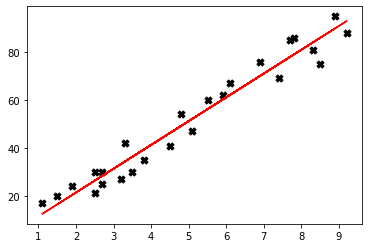

In [15]:
line = reg.coef_*x+reg.intercept_
plt.scatter(x,y, s = 50, marker = 'X', color = 'black')
plt.plot(x,line, color = 'red')
plt.show()

# Prediction

In [14]:
Y_pred = reg.predict(X_test)
Y_pred

array([12.44258714, 26.35944834, 20.39507925, 92.9615698 , 70.09815497])

Comparing the Actual and the Predicted Data

In [16]:
DataF = pd.DataFrame(np.c_[X_test, y_test, Y_pred], columns = ["Hours", "Actual Score", "Predicted Score"])
DataF

,Hours,Actual Score,Predicted Score
0,1.1,17.0,12.442587
1,2.5,21.0,26.359448
2,1.9,24.0,20.395079
3,9.2,88.0,92.961570
4,6.9,76.0,70.098155


Checking the accuracy of the prediction

In [17]:
reg.score(X_test, y_test)

0.9735538080811826

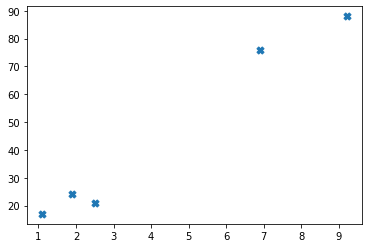

In [18]:
plt.scatter(X_test, y_test,s = 50, marker = 'X' )

# Plotting the linear regression line

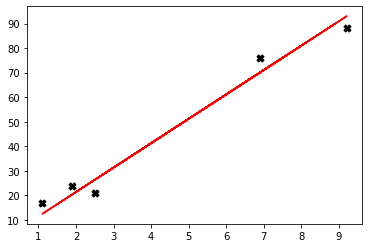

In [19]:
plt.scatter(X_test, y_test,s = 50, marker = 'X', color = 'black' )
plt.plot(x, line, color = 'red')
plt.show()

# Required Output

In [20]:
Hours = [[9.25]]
Predict = reg.predict(Hours)
print("Hours           : {}".format(Hours))
print("Predicted Score : {}".format(Predict[0]))

Hours           : [[9.25]]
Predicted Score : 93.45860055685799


# Evaluating the Model

In [25]:
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))


Mean Absolute Error :  4.877039354964484
Mean Squared Error: 24.38762033985666
Root Mean Squared Error: 4.938382360637607
